In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from numpy import mean
from numpy import var
from math import sqrt

In [2]:
#all_rating_processed = pd.read_csv(r'C:/Users/Armit/uni_pass/Scripts/Project/all_rating_processed.csv', sep = '\t', encoding='utf-8')
# we sinchronise dictionaries so new processed file must be used
all_rating_processed = pd.read_csv(r'C:/Users/Armit/uni_pass/Scripts/Project/all_rating_processed_adj_dict.csv', sep = '\t', encoding='utf-8')



In [3]:
len(all_rating_processed)

914172

In [4]:
len(all_rating_processed['Country'].unique())

56

In [5]:
all_rating_processed['Country'].unique()

array(['Undefined', 'UnitedStates', 'France', 'Poland', 'Belgium',
       'UnitedKingdom', 'Sweden', 'Finland', 'Austria', 'Norway',
       'Germany', 'Netherlands', 'Canada', 'Switzerland', 'Italy',
       'Russia', 'Spain', 'Portugal', 'Lithuania', 'Denmark', 'England',
       'Scotland', 'Ireland', 'Hungary', 'Greece', 'Wales', 'Bulgaria',
       'Croatia', 'Belarus', 'Malta', 'Serbia', 'Slovakia', 'Ukraine',
       'Romania', 'Estonia', 'Luxembourg', 'CzechRepublic', 'Iceland',
       'Turkey', 'Slovenia', 'Latvia', 'SanMarino', 'Georgia', 'Andorra',
       'Moldova', 'IsleofMan', 'Cyprus', 'Macedonia',
       'BosniaandHerzegovina', 'Other-EasternEurope', 'VaticanCity',
       'FaroeIslands', 'Monaco', 'Greenland', 'Montenegro', 'Albania'],
      dtype=object)

In [6]:
all_rating_processed['Continent'].unique()

array(['Undefined', 'NorthAmerica', 'Europe'], dtype=object)

As an input we have data about 37 counties + Undefined, all of which are mapped into Continents (NorthAmerica, Undefined and Europe)

In [7]:
all_rating_processed.head(3)

,Unnamed: 0,Game_name,Gamer,Date,Rating,Location,file,Country,Continent
0,0,Gloomhaven,guile678,Mar2020,8.70000,Undefined,0_174430_20_pages.csv,Undefined,Undefined
1,1,Gloomhaven,purplephoenixgames,Mar2020,-0.00001,"Milan,Illinois·UnitedStates",0_174430_20_pages.csv,UnitedStates,NorthAmerica
2,2,Gloomhaven,oneover,Mar2020,8.00000,Undefined,0_174430_20_pages.csv,Undefined,Undefined


In [8]:
all_rating_processed.drop(['Unnamed: 0','Location','file'], axis=1, inplace = True)

## Distribution

### Histograms 

In [9]:
all_rating_processed.describe()

,Rating
count,914172.000000
mean,6.971864
std,2.325511
min,-0.000010
25%,6.500000
50%,7.500000
75%,8.000000
max,10.000000


<AxesSubplot:>

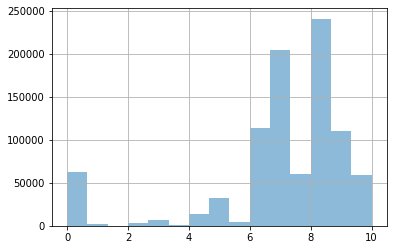

In [10]:
all_rating_processed['Rating'].hist(bins=15, alpha=0.5)

We have a spike around 0 presumably caused by not given rating, which we marked as -0.00001.
Let's filter it out 

<AxesSubplot:>

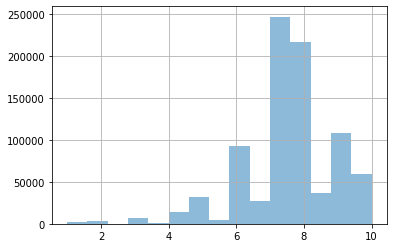

In [11]:
all_rating_processed[all_rating_processed['Rating'] >= 0]['Rating'].hist(bins=15, alpha=0.5)

Assumption was correct. Finally for 3 Continents we see that data is left-skewed. 

In [12]:
NA_data = all_rating_processed[all_rating_processed['Continent'] =='NorthAmerica']
Undef_data = all_rating_processed[all_rating_processed['Continent'] =='Undefined']
EU_data = all_rating_processed[all_rating_processed['Continent'] =='Europe']

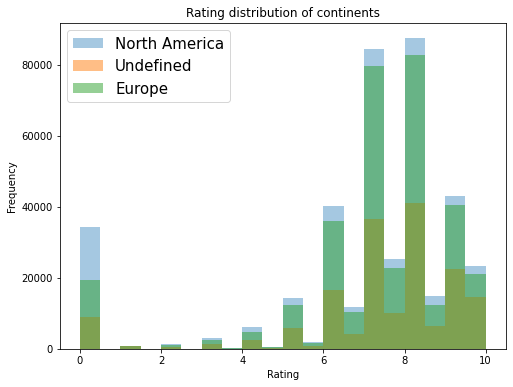

In [13]:
plt.figure(figsize=(8,6))
plt.hist(NA_data['Rating'], bins=20, label='North America', alpha=0.4)
plt.hist(Undef_data['Rating'], bins=20,  label='Undefined', alpha=0.5)
plt.hist(EU_data['Rating'], bins=20,  label='Europe', alpha=0.5)
plt.title("Rating distribution of continents")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(prop ={'size': 15}) 
plt.show()

### Boxplot

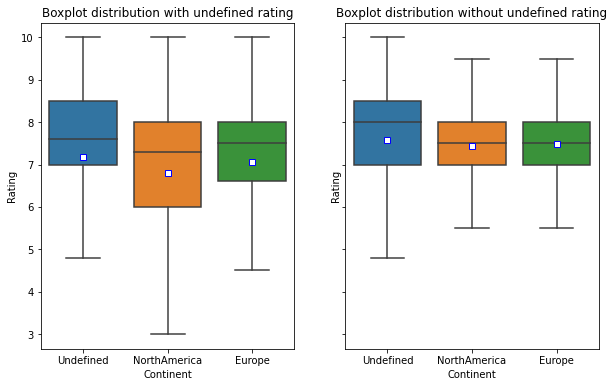

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

sns.boxplot(x='Continent', y= 'Rating', 
            data=all_rating_processed, 
            showfliers=False, 
            showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},
            ax=ax[0])
ax[0].set_title('Boxplot distribution with undefined rating')

sns.boxplot(x='Continent', y= 'Rating', 
            data=all_rating_processed[all_rating_processed['Rating'] >= 0], 
            showfliers=False, 
            showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},
            ax=ax[1])
ax[1].set_title('Boxplot distribution without undefined rating')

plt.show()

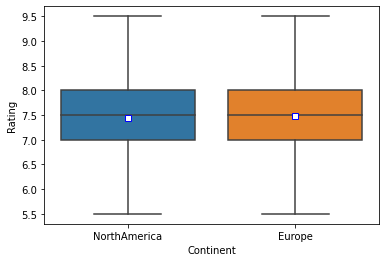

In [15]:
sns.boxplot(x = 'Continent', y = 'Rating', 
            data = all_rating_processed[(all_rating_processed['Rating'] >= 0) & 
                                      (all_rating_processed['Continent'].isin(['NorthAmerica','Europe']))], 
            showfliers=False, 
            showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})


plt.show()

In [16]:
avg_ratinng = all_rating_processed[(all_rating_processed['Rating'] >= 0) & 
                          (all_rating_processed['Continent'].isin(['NorthAmerica','Europe']))].groupby(['Continent']).mean()

In [17]:
avg_ratinng.reset_index(inplace=True)

In [18]:
avg_ratinng[avg_ratinng['Continent'] == 'Europe']['Rating'] - avg_ratinng[avg_ratinng['Continent'] == 'NorthAmerica']['Rating']

0   NaN
1   NaN
Name: Rating, dtype: float64

In [19]:
avg_ratinng.set_index('Continent').diff() 

,Rating
Continent,
Europe,NaN
NorthAmerica,-0.03026


In [20]:
avg_ratinng

,Continent,Rating
0,Europe,7.478705
1,NorthAmerica,7.448446


In [21]:
7.4787 - 7.4484

0.03029999999999955

## Hypothesis

Formulate H0 (important: we formulate H0 in a way that there is no differece, that is why it is zero hypothesis).

**H₀** for our case:

**Average defined gamers' rating between Europe and North Americe has no difference.** 

The **alternative hypothesis H₁** will be:

**Average defined gamers' rating between Europe and North Americe has difference.**

A significance level of α(alpha) = 0.05, in other words we state that 100% of confidence in hypothesis test is difficult to reach, so that with declared significance level (5%) we state that risk of false positive difference discovcery is 5%.

As our data is skewed, we cannot perform Student's test (ttest) , we should use non-parametric test (a.k.a distribution free methods) for two (unpaired) samples MannWhitney test (equivalent to Wilcoxon test).
P.S. Unpaired means that both samples consist of distinct test subjects and we assume that gamers do not use two different locations (countries/continets) to provide feedback. 

In [22]:
NA_data_wt_undef = NA_data[NA_data['Rating'] >=0]
EU_data_wt_undef = EU_data[EU_data['Rating'] >=0]

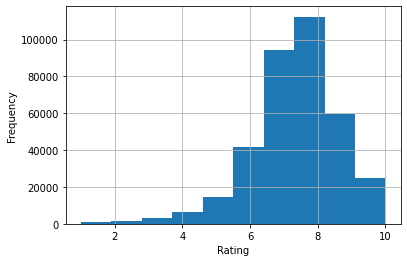

In [23]:
NA_data_wt_undef.hist()
#plt.title("Rating distribution NorthAmerica")
plt.title("")
plt.xlabel('Rating')
plt.ylabel('Frequency')
#plt.legend(prop ={'size': 15}) 
plt.show()

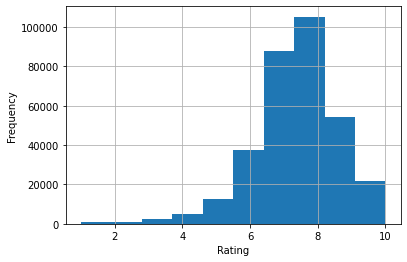

In [24]:
EU_data_wt_undef.hist()
#plt.title("Rating distribution Europe")
plt.title("")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [25]:
alpha = 0.05

results = st.mannwhitneyu(
    NA_data_wt_undef['Rating'], 
    EU_data_wt_undef['Rating'])

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject H₀")
else:
    print("Accept H₀")

p-value: 5.648866776980333e-11
Reject H₀


In [26]:
def stat_calc(d1, d2):
    #mean_diff = d1.mean() - d2.mean()
    #results = st.mannwhitneyu(d1,d2)
    
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    effect_size = (u1 - u2) / s
    # calculate the effect size
    return effect_size

In [27]:
stat_calc(NA_data_wt_undef['Rating'],EU_data_wt_undef['Rating'])

-0.02181012986785638